# Série Temporelle

## Preprocessing

### Import du dataset et split temporel

#### Import du dataset avec comme index date

In [43]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [44]:
from numba import njit, prange

from concurrent.futures import ThreadPoolExecutor, as_completed
def travail_lourd(x):
    if x == 5:
        raise ValueError("Oups, erreur volontaire pour x=5")
    time.sleep(1)
    return x * x
inputs = list(range(12))
results = []
max_workers = min(4, os.cpu_count() or 1)
with ThreadPoolExecutor(max_workers=max_workers) as exe:
    futures = {exe.submit(travail_lourd, i): i for i in inputs}
    for fut in as_completed(futures):
        i = futures[fut]
        try:
            res = fut.result()
        except Exception as e:
            print(f"Tâche {i} a levé une exception : {e}")
            res = None
        results.append(res)
print("Résultats :", results)
@njit(parallel=True)
def somme_racines(n):
    tmp = np.zeros(n)
    for i in prange(n):
        tmp[i] = np.sqrt(i)
    return np.sum(tmp)

Tâche 5 a levé une exception : Oups, erreur volontaire pour x=5
Résultats : [0, 1, None, 4, 9, 36, 16, 49, 64, 81, 100, 121]


In [45]:
import numpy as np
from numba import njit, prange

@njit(parallel=True)
def somme_racines(n):
    acc = 0.0
    for i in prange(n):
        acc += np.sqrt(i)
    return acc

# utilise tous les threads automatiquement
print(somme_racines(100_000_000))


666666661666.4618


In [46]:
## paths
# folder_path_M = '/Users/maximehenon/Documents/GitHub/MAR25_BDS_Compagnon_Immo/'
folder_path_Y = "C:/Users/charl/OneDrive/Documents/Yasmine/DATASCIENTEST/FEV25-BDS-COMPAGNON"
# folder_path_C = '../data/processed/Sales'
# folder_path_L= '/Users/loick.d/Documents/Datascientest/Github immo/MAR25_BDS_Compagnon_Immo/'


# Load the dataset
# output_file = os.path.join(folder_path_M, 'df_sales_clean_ST.csv')
output_file = os.path.join(folder_path_Y, "df_sales_clean_ST.csv")
# output_file = os.path.join(folder_path_C, 'df_sales_clean_ST.csv')
# output_file = os.path.join(folder_path_L, 'df_sales_clean_ST.csv')

from tqdm import tqdm
import time

# Exemple d'une boucle avec une barre de progression
for i in tqdm(range(100)):
    time.sleep(0.1)  # Simuler un traitement long
    
chunksize = 100000  # Number of rows per chunk
chunks = pd.read_csv(
    output_file,
    sep=";",
    chunksize=chunksize,
    index_col="date",
    parse_dates=["date"],
    on_bad_lines="skip",
    low_memory=False,
)
# Process chunks
df_sales_clean_ST = pd.concat(chunk for chunk in chunks).sort_values(by="date")
print(df_sales_clean_ST.index.unique().sort_values().to_series().dt.day.unique())

print(df_sales_clean_ST.groupby("date")["INSEE_COM"].nunique().head(12))

display(df_sales_clean_ST.head())



100%|██████████| 100/100 [00:10<00:00,  9.83it/s]


[1]
date
2019-02-01     3237
2019-03-01     1983
2019-04-01     2603
2019-05-01     3570
2019-06-01     2559
2019-07-01     2367
2019-08-01     3349
2019-09-01     3447
2019-10-01     1812
2019-11-01     3279
2019-12-01     2855
2020-01-01    18634
Name: INSEE_COM, dtype: int64


,typedebien,typedetransaction,etage,surface,surface_terrain,nb_pieces,balcon,eau,bain,dpeL,...,loyer_m2_median_n7_outlier_flag_outlier_flag,nb_log_n7_outlier_flag_outlier_flag,taux_rendement_n7_outlier_flag_outlier_flag,avg_purchase_price_m2_outlier_flag_outlier_flag,avg_rent_price_m2_outlier_flag_outlier_flag,rental_yield_pct_outlier_flag_outlier_flag,IPS_primaire_outlier_flag_outlier_flag,prix_m2_vente_outlier_flag_outlier_flag,Year_outlier_flag,Month_outlier_flag
date,,,,,,,,,,,,,,,,,,,,,
2019-02-01,an,v,0.0,84.0,NaN,4.0,0,0.0,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0
2019-02-01,an,v,0.0,127.0,NaN,5.0,0,0.0,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0
2019-02-01,m,v,0.0,149.0,NaN,6.0,0,0.0,2.0,NaN,...,0,0,0,0,0,0,0,0,0,0
2019-02-01,an,v,0.0,45.0,NaN,2.0,0,0.0,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0
2019-02-01,an,v,0.0,20.0,NaN,1.0,0,0.0,0.0,NaN,...,0,0,0,0,0,0,0,0,0,0


#### Ajout de la variable code postal

In [47]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point

# === 2. CHARGEMENT DES POLYGONES DE CODES POSTAUX ===
## Paths
# folder_path_M = '/Users/maximehenon/Documents/GitHub/MAR25_BDS_Compagnon_Immo/'
# folder_path_Y = "C:/Users/charl/OneDrive/Documents/Yasmine/DATASCIENTEST/FEV25-BDS-COMPAGNON/"
folder_path_C = '../data/geo/json'


geo_file_name = 'contours-codes-postaux.geojson'
input_file = os.path.join(folder_path_C, geo_file_name)

pcodes = gpd.read_file(input_file)[['codePostal', 'geometry']]
print("Polygones chargés :", pcodes.shape)
df_sales_clean_ST = df_sales_clean_ST.reset_index()

# === 4. PRÉTRAITEMENT GEO ===
df_base = df_sales_clean_ST.copy()

df_base = df_base.dropna(subset=['mapCoordonneesLatitude', 'mapCoordonneesLongitude'])
df_base['lat'] = df_base['mapCoordonneesLatitude']#.round(3)
df_base['lon'] = df_base['mapCoordonneesLongitude']#.round(3)
df_base['orig_index'] = df_base.index

# === 5. FONCTION DE TRAITEMENT SPATIAL D'UN CHUNK ===
def process_chunk(chunk, pcodes):
    chunk = chunk.copy()
    chunk['geometry'] = gpd.points_from_xy(chunk['lon'], chunk['lat'])
    gdf = gpd.GeoDataFrame(chunk, geometry='geometry', crs='EPSG:4326')
    joined = gpd.sjoin(gdf, pcodes, how='left', predicate='within')
    return joined[['orig_index', 'codePostal']]  # retour minimal

# === 6. TRAITEMENT PAR CHUNKS POUR LIMITER LA MÉMOIRE ===
chunksize = 100_000
results = []

for i in range(0, len(df_base), chunksize):
    #print(f"Traitement du chunk {i} → {i+chunksize}")
    chunk = df_base.iloc[i:i+chunksize]
    result = process_chunk(chunk, pcodes)
    results.append(result)

# === 7. CONCATÉNATION DES RÉSULTATS ET MERGE FINAL ===
df_joined = pd.concat(results, ignore_index=True).drop_duplicates("orig_index")

df_sales_clean_ST['orig_index'] = df_sales_clean_ST.index  # pour merge

df_sales_clean_ST = df_sales_clean_ST.merge(df_joined[['orig_index', 'codePostal']], on="orig_index", how="left")
df_sales_clean_ST.drop(columns=['orig_index'], inplace=True)

# === 8. VÉRIFICATION DU RÉSULTAT ===
print(df_sales_clean_ST[['mapCoordonneesLatitude', 'mapCoordonneesLongitude', 'codePostal', 'date']].head())
print("Code postal manquant :", df_sales_clean_ST['codePostal'].isna().sum())

Polygones chargés : (6158, 2)
   mapCoordonneesLatitude  mapCoordonneesLongitude codePostal       date
0                48.86145                  2.17940      92500 2019-02-01
1                45.77299                  6.58753        NaN 2019-02-01
2                49.66212                  3.36596      02800 2019-02-01
3                43.61687                  1.32916      31770 2019-02-01
4                48.11889                 -1.68881      35000 2019-02-01
Code postal manquant : 93808


#### Agrégation mensuelle 

In [48]:
df_sales_clean_ST['date'] = pd.to_datetime(df_sales_clean_ST['date'], errors='coerce')
df_sales_clean_ST = df_sales_clean_ST.sort_values('date')

# Définir la colonne 'date' comme index
df_sales_clean_ST = df_sales_clean_ST.set_index('date')


# Creation des variable année et mois et traiter le codePostal

df_sales_clean_ST["Year"] = df_sales_clean_ST.index.year
df_sales_clean_ST["Month"] = df_sales_clean_ST.index.month

df_sales_clean_ST["codePostal"] = df_sales_clean_ST["codePostal"].astype(str).str.replace(r"\.0$", "", regex=True)

datetime_cols = df_sales_clean_ST.select_dtypes(include=["datetime64[ns]"]).columns

for col in datetime_cols:
    print(f"Colonne datetime : {col}")
    print(df_sales_clean_ST[col].unique())


# corriger les valeurs de la colonne 'codePostal'
for code in df_sales_clean_ST["codePostal"].unique():
    if len(str(code)) < 5:
        code = str(code).zfill(5)
    # Convert 'codePostal' to string
df_sales_clean_ST["codePostal"] = df_sales_clean_ST["codePostal"].astype(str)
display(df_sales_clean_ST.head())


,typedebien,typedetransaction,etage,surface,surface_terrain,nb_pieces,balcon,eau,bain,dpeL,...,nb_log_n7_outlier_flag_outlier_flag,taux_rendement_n7_outlier_flag_outlier_flag,avg_purchase_price_m2_outlier_flag_outlier_flag,avg_rent_price_m2_outlier_flag_outlier_flag,rental_yield_pct_outlier_flag_outlier_flag,IPS_primaire_outlier_flag_outlier_flag,prix_m2_vente_outlier_flag_outlier_flag,Year_outlier_flag,Month_outlier_flag,codePostal
date,,,,,,,,,,,,,,,,,,,,,
2019-02-01,an,v,0.0,84.0,NaN,4.0,0,0.0,0.0,NaN,...,0,0,0,0,0,0,0,0,0,92500
2019-02-01,a,v,2.0,63.0,NaN,3.0,0,1.0,0.0,C,...,0,0,0,0,0,0,0,0,0,83000
2019-02-01,an,v,0.0,73.0,NaN,4.0,0,0.0,0.0,NaN,...,0,0,0,0,0,0,0,0,0,78600
2019-02-01,m,v,0.0,103.0,NaN,4.0,0,1.0,1.0,D,...,0,0,0,0,0,0,0,0,0,78580
2019-02-01,a,v,5.0,94.0,NaN,3.0,0,0.0,1.0,C,...,0,0,0,0,0,0,0,0,0,20000


#### Split Train et Test

In [49]:
# SPLIT

train_clean = df_sales_clean_ST[
    (df_sales_clean_ST["Year"] < 2024) & (df_sales_clean_ST["Year"] > 2019)
]
test_clean = df_sales_clean_ST[df_sales_clean_ST["Year"] >= 2024]

display(test_clean.head())
test_clean = test_clean.reset_index()
train_clean = train_clean.reset_index()
display(train_clean["codePostal"].head())
display(train_clean[train_clean["codePostal"] =="75019"].head())

,typedebien,typedetransaction,etage,surface,surface_terrain,nb_pieces,balcon,eau,bain,dpeL,...,nb_log_n7_outlier_flag_outlier_flag,taux_rendement_n7_outlier_flag_outlier_flag,avg_purchase_price_m2_outlier_flag_outlier_flag,avg_rent_price_m2_outlier_flag_outlier_flag,rental_yield_pct_outlier_flag_outlier_flag,IPS_primaire_outlier_flag_outlier_flag,prix_m2_vente_outlier_flag_outlier_flag,Year_outlier_flag,Month_outlier_flag,codePostal
date,,,,,,,,,,,,,,,,,,,,,
2024-01-01,m,v,0.0,101.0,278.0,5.0,0,0.0,0.0,A,...,0,0,0,0,0,0,0,1,0,57440
2024-01-01,m,v,0.0,89.0,678.0,5.0,0,0.0,0.0,A,...,0,0,0,0,0,0,0,1,0,60540
2024-01-01,a,v,2.0,54.0,NaN,3.0,0,0.0,0.0,D,...,0,0,0,0,0,0,0,1,0,21000
2024-01-01,m,v,0.0,117.0,839.0,6.0,0,1.0,1.0,D,...,0,0,0,0,0,0,0,1,0,58640
2024-01-01,m,v,0.0,147.0,1398.0,5.0,0,1.0,0.0,E,...,0,0,0,0,0,0,0,1,0,45320


0    83310
1    81000
2    01090
3    44380
4    25420
Name: codePostal, dtype: object

,date,typedebien,typedetransaction,etage,surface,surface_terrain,nb_pieces,balcon,eau,bain,...,nb_log_n7_outlier_flag_outlier_flag,taux_rendement_n7_outlier_flag_outlier_flag,avg_purchase_price_m2_outlier_flag_outlier_flag,avg_rent_price_m2_outlier_flag_outlier_flag,rental_yield_pct_outlier_flag_outlier_flag,IPS_primaire_outlier_flag_outlier_flag,prix_m2_vente_outlier_flag_outlier_flag,Year_outlier_flag,Month_outlier_flag,codePostal
948,2020-01-01,a,v,1.0,86.0,NaN,4.0,0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,75019
2265,2020-01-01,a,v,0.0,162.0,NaN,5.0,0,1.0,1.0,...,0,0,0,0,0,0,0,0,0,75019
3110,2020-01-01,a,v,0.0,62.0,NaN,3.0,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,75019
3215,2020-01-01,a,v,0.0,56.0,NaN,3.0,0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,75019
5053,2020-01-01,a,v,8.0,70.0,NaN,3.0,1,0.0,1.0,...,0,0,0,0,0,0,0,0,0,75019


#### Analyse des tendances

##### Agrégation des données par mois

In [50]:
train_clean["departement"] = train_clean["codePostal"].astype(str).str[:2]
test_clean["departement"] = test_clean["codePostal"].astype(str).str[:2]

train_copy = train_clean.copy()

train_mensuel = (
    train_copy.groupby(["Year", "Month", "departement", "codePostal"])
    .agg(prix_m2_vente=("prix_m2_vente", "mean"))
    .reset_index()
)




##### Formattage des données temporelles

In [51]:
# Pour le mensuel
train_mensuel["date"] = pd.to_datetime(
    train_mensuel["Year"].astype(str) + "-" + train_mensuel["Month"].astype(str) + "-01"
)

##### Visualisation

In [52]:
import plotly.express as px
import pandas as pd

Train_pour_graph = (
    train_clean.groupby(["Year", "Month"])
    .agg(prix_m2_vente=("prix_m2_vente", "mean"))
    .reset_index()
)

Train_pour_graph["date"] = pd.to_datetime(
    Train_pour_graph["Year"].astype(str)
    + "-"
    + Train_pour_graph["Month"].astype(str)
    + "-01"
)

###########################################
# Filtrage avec des dropdowns par departement

fig_mensuel_glob = px.line(
    Train_pour_graph,
    x="date",
    y="prix_m2_vente",
    title="Évolution mensuelle du prix moyen au m² ",
    labels={"date": "Date", "prix_m2_vente": "Prix moyen (€ / m²)"},
)

fig_mensuel_glob.update_traces(mode="lines+markers")
fig_mensuel_glob.update_layout(
    title_x=0.5,
    title_y=0.95,
    title_font_size=20,
    xaxis_title="Date",
    yaxis_title="Prix moyen (€ / m²)",
    hovermode="x unified",
)

fig_mensuel_glob.update_xaxes(title_font=dict(size=14), tickfont=dict(size=12))
fig_mensuel_glob.update_yaxes(title_font=dict(size=14), tickfont=dict(size=12))
fig_mensuel_glob.show()

###########################################
# Filtrage avec des dropdowns par departement
Train_pour_graph_cp = (
    train_clean.groupby(["Year", "Month", "departement"])
    .agg(prix_m2_vente=("prix_m2_vente", "mean"))
    .reset_index()
)
Train_pour_graph_cp["date"] = pd.to_datetime(
    Train_pour_graph_cp["Year"].astype(str)
    + "-"
    + Train_pour_graph_cp["Month"].astype(str)
    + "-01"
)

fig_mensuel = px.line(
    Train_pour_graph_cp,
    x="date",
    y="prix_m2_vente",
    color="departement",
    title="Évolution mensuelle du prix moyen au m² par departement",
    labels={
        "date": "Date",
        "prix_m2_vente": "Prix moyen (€ / m²)",
        "departement": "departement",
    },
)

fig_mensuel.update_traces(mode="lines+markers")
fig_mensuel.update_layout(
    title_x=0.5,
    title_y=0.95,
    title_font_size=20,
    xaxis_title="Date",
    yaxis_title="Prix moyen (€ / m²)",
    legend_title_text="departement",
    hovermode="x unified",
)

fig_mensuel.update_xaxes(title_font=dict(size=14), tickfont=dict(size=12))
fig_mensuel.update_yaxes(title_font=dict(size=14), tickfont=dict(size=12))

# Ajout de menus déroulants pour filtrer par departement et année
departement = train_mensuel["departement"].unique()

# Menu pour filtrer par departement
departement_buttons = [
    dict(
        label=str(cp),
        method="update",
        args=[
            {"visible": [cp == c for c in departement]},
            {"title": f"Évolution mensuelle pour le departement {cp}"},
        ],
    )
    for cp in departement
]

fig_mensuel.update_layout(
    updatemenus=[
        dict(
            active=0,
            buttons=departement_buttons,
            direction="down",
            showactive=True,
            x=1.15,
            xanchor="left",
            y=1.1,
            yanchor="top",
            pad={"r": 10, "t": 10},
            bgcolor="white",
            bordercolor="black",
            borderwidth=1,
        )
    ]
)

fig_mensuel.show()

Pour mieux expliquer l'évolution de la Target, nous ajoutons les taux immobilier à notre set de donnée

## Enrichissement du dataset

Pour mieux adresser le problème, nous allons procéder à la segmentation des departements afin d'adresser les prix par segment géographique
Par exemple sur les biens immobiliers comme Paris, nous allons l'enrichir par des données de taux d'emprunt immobilier, taux de chomage, ...

### Extraction des indicateurs pour clustering

#### Ajustement de la granularité pour le clustering


##### Constat initial

Nous avons commencé par réaliser un clustering par code postal, en utilisant des indicateurs agrégés par `codePostal` (prix moyen, écart-type, taux de croissance annuel moyen, etc.).  
Cependant, au fil de l'analyse, nous avons constaté que **de nombreux codes postaux disposaient de très peu de données**, parfois **moins de 5 ventes**.

Cela posait plusieurs problèmes :
- Les statistiques calculées (moyenne, écart-type, TCAM) étaient **peu fiables**.
- Ces points faiblement renseignés pouvaient **brouiller le clustering** global.

##### Seuil critique observé

Nous avons observé que :
- Certains `codePostal` n'avaient **qu'une seule entrée**.
- Le seuil de **10 observations** est un minimum généralement admis pour calculer des agrégations fiables.

##### Solution mise en œuvre : **agrégation hybride**

Pour conserver à la fois **la précision locale** quand elle est disponible, et **la stabilité statistique** ailleurs, nous avons adopté une stratégie hybride :

- Si un `codePostal` contient **au moins 10 observations**, il est **conservé tel quel**.
- Sinon, il est **regroupé au niveau du département** (`codePostal[:2]`).

Nous avons donc créé une nouvelle colonne appelée `zone_mixte`, qui contient :
- soit le code postal complet (`75001`, `13008`, etc.)
- soit le code départemental (`30`, `32`, `97`, etc.)

##### Objectif

Cette approche permet de :
- **Préserver la finesse géographique** dans les zones bien renseignées,
- **Limiter le bruit** dans les zones sous-représentées,
- Améliorer la **qualité du clustering** sans perdre d'information utile.



#### Création de la variable hybride 'Zone Mixte' - Departement & Code Postal

In [53]:
# On s'assure que les codes postaux sont bien au format 5 chiffres

train_clean["date"] = pd.to_datetime(train_clean["date"])
test_clean ["date"] = pd.to_datetime(test_clean ["date"])

# On garde les codes postaux fréquents
cp_counts = train_clean["codePostal"].value_counts()
cp_frequents_str = set(cp_counts[cp_counts >= 10].index)


# Fonction hybride
def regroup_code(row, frequents_set):
    cp = row["codePostal"]
    if cp in frequents_set:
        return cp  # code postal détaillé
    elif cp.startswith("97"):
        return cp[:3]  # DROM-COM
    elif cp.isdigit() and len(cp) == 5:
        return cp[:2]  # département
    else:
        return "inconnu"


#  Application sur train et test
train_clean["zone_mixte"] = train_clean.apply(
    lambda row: regroup_code(row, cp_frequents_str), axis=1
)

# Pour test_clean, on applique exactement la même logique sans recalculer les fréquences
test_clean["zone_mixte"] = test_clean.apply(
    lambda row: regroup_code(row, cp_frequents_str), axis=1
)

##### construction d'un jeu d'entrainement avec la variable 'Zone Mixte' et un lag -1

In [54]:
for df in (train_clean, test_clean):
    df.sort_values(["zone_mixte", "date"], inplace=True)
    df["prix_lag_1m"] = (
        df.groupby("zone_mixte")["prix_m2_vente"].shift(1)
    )
    df["prix_roll_3m"] = (
        df.groupby("zone_mixte")["prix_m2_vente"]
          .rolling(3, closed="left")
          .mean()
          .reset_index(level=0, drop=True)
    )

# contruire un jeu train et test avec les zones mixtes par mois
train_mensuel = (
    train_clean.groupby(["Year", "Month", "zone_mixte"])
    .agg(
        prix_m2_vente =("prix_m2_vente", "mean"),
        volume_ventes=("prix_m2_vente", "count"), 
    )
    .reset_index()
)


### Création de variable propre à la segmentation géographique
Ces variables vont évaluer la volatilité du prix, le taux de croissance, la moyenne des prix et la variabilité

#### Calcul du taux de croissance annuel lissé
L'objectif est de prendre en compte la tendance globale de l'évolution des prix par code postal,
sur toute la période observée, en lissant les variations mois par mois.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# --- Chargement / check initial ---
# train_mensuel doit exister et contenir au minimum :
# ['zone_mixte', 'Year', 'Month', 'prix_m2_vente']
assert all(col in train_mensuel.columns 
           for col in ["zone_mixte", "Year", "Month", "prix_m2_vente"]),  "Il manque des colonnes dans train_mensuel."

# ---  Reconstruction du code postal propre ---
def get_code_postal_final(zone):
    s = str(zone)
    if s.isdigit() and len(s) == 5:
        return s
    if s.isdigit() and len(s) == 2:
        return s + "000"
    if s.startswith("97") and len(s) == 3:
        return s + "00"
    return "inconnu"

train_mensuel = train_mensuel.copy()
train_mensuel["codePostal_recons"] = (
    train_mensuel["zone_mixte"].apply(get_code_postal_final)
)

# 2. Date, ordinal et temps t (en mois depuis le début)
train_mensuel["date"] = pd.to_datetime(
    train_mensuel["Year"].astype(str)
    + "-" +
    train_mensuel["Month"].astype(str).str.zfill(2)
    + "-01"
)
train_mensuel["ym_ordinal"] = train_mensuel["Year"] * 12 + train_mensuel["Month"]
train_mensuel = train_mensuel.sort_values(["codePostal_recons","date"])
train_mensuel["t"] = (
    train_mensuel
    .groupby("codePostal_recons")["ym_ordinal"]
    .transform(lambda x: x - x.min())
)

# 3. Lags et moyennes mobiles (rolling)
train_mensuel["prix_lag_1m"] = (
    train_mensuel
    .groupby("codePostal_recons")["prix_m2_vente"]
    .shift(1)
)
train_mensuel["prix_roll_3m"] = (
    train_mensuel
    .groupby("codePostal_recons")["prix_m2_vente"]
    .rolling(3, closed="left")
    .mean()
    .reset_index(level=0, drop=True)
)

# 4. Log-prix et TCAM
train_mensuel["log_prix"] = np.log(train_mensuel["prix_m2_vente"])

def compute_tcam(df):
    if len(df) < 2 or df["log_prix"].isna().any():
        return np.nan
    X = df[["t"]].values.reshape(-1,1)
    y = df["log_prix"].values
    coef = LinearRegression().fit(X, y).coef_[0]
    return (np.exp(coef) - 1) * 100 * 12

tcam_df = (
    train_mensuel
    .groupby("codePostal_recons")
    .apply(compute_tcam)
    .reset_index(name="tc_am_reg")
)

# 5. Assemblage final des features
train_mensuel = (
    train_mensuel
    .merge(tcam_df, on="codePostal_recons", how="left")
    .rename(columns={"prix_m2_vente": "prix_m2_mean"})
    # Ne drop que les lignes où tes features indispensables sont manquantes
    .dropna(subset=["prix_lag_1m", "prix_roll_3m", "tc_am_reg"])
    .reset_index(drop=True)
)


train_mensuel["log_prix"]   = np.log(train_mensuel["prix_m2_mean"])
train_mensuel["t"]          = (
    train_mensuel
    .groupby("codePostal_recons")["ym_ordinal"]
    .transform(lambda x: x - x.min())
)


print(train_mensuel.head())


   Year  Month zone_mixte  prix_m2_mean  volume_ventes codePostal_recons  \
0  2020      4      01000   2561.995385             13             01000   
1  2020      5      01000   1956.464706             34             01000   
2  2020      6      01000   2004.044667             45             01000   
3  2020      7      01000   2087.972069             58             01000   
4  2020      8      01000   1835.048889             27             01000   

        date  ym_ordinal  t  prix_lag_1m  prix_roll_3m  log_prix  tc_am_reg  
0 2020-04-01       24244  0  1890.695926   1972.224380  7.848542   4.338907  
1 2020-05-01       24245  1  2561.995385   2190.504200  7.578894   4.338907  
2 2020-06-01       24246  2  1956.464706   2136.385339  7.602923   4.338907  
3 2020-07-01       24247  3  2004.044667   2174.168252  7.643949   4.338907  
4 2020-08-01       24248  4  2087.972069   2016.160481  7.514826   4.338907  


#### calcul des autres feature et integration du Taux de croissance annuel lissé

In [56]:
df_cluster_input = (
    train_mensuel
    .groupby("codePostal_recons")
    .agg(
        # on agrège les moyennes mensuelles calculées plus tôt
        prix_m2_mean = ("prix_m2_mean", "mean"),
        prix_m2_std  = ("prix_m2_mean", "std"),
        prix_m2_max  = ("prix_m2_mean", "max"),
        prix_m2_min  = ("prix_m2_mean", "min"),
        # on agrège aussi tes lags & rolling
        avg_lag_1m   = ("prix_lag_1m",   "mean"),
        avg_roll_3m  = ("prix_roll_3m",  "mean"),
         )
    .assign(
        prix_m2_cv = lambda df: df["prix_m2_std"] / df["prix_m2_mean"]
    )
    .reset_index()
    # fusionne ensuite ton TCAM déjà calculé
    .merge(tcam_df, on="codePostal_recons", how="left")
)

print(df_cluster_input.head())


  codePostal_recons  prix_m2_mean  prix_m2_std  prix_m2_max  prix_m2_min  \
0             01000   2377.434977   469.208451  4875.000000  1835.048889   
1             01090   2879.623705   336.529680  3598.243478  2245.127500   
2             01100   1741.679226   279.525967  2796.891111  1377.496000   
3             01110   1490.234189   473.853221  2511.360000   785.710000   
4             01120   3282.385256   381.605642  4168.442000  2498.852000   

    avg_lag_1m  avg_roll_3m  prix_m2_cv  tc_am_reg  
0  2366.589718  2363.007720    0.197359   4.338907  
1  2878.801292  2878.844042    0.116866   5.546078  
2  1739.300578  1732.425424    0.160492   4.906533  
3  1475.540083  1465.514321    0.317972  10.722392  
4  3270.332748  3256.908635    0.116259   7.531989  


##### Vérification de la qualité du taux de croissance annuel

['01000' '01090' '01100' ... '97440' '97600' 'inconnu']
(45, 13)
        Year  Month zone_mixte  prix_m2_mean  volume_ventes codePostal_recons  \
173925  2020      4      75019  10235.815000              4             75019   
173926  2020      5      75019  10103.744867            113             75019   
173927  2020      6      75019   9559.316757            148             75019   
173928  2020      7      75019   9586.810950            200             75019   
173929  2020      8      75019   9607.561389             36             75019   

             date  ym_ordinal  t   prix_lag_1m  prix_roll_3m  log_prix  \
173925 2020-04-01       24244  0  10449.391224   9918.922340  9.233648   
173926 2020-05-01       24245  1  10235.815000  10248.623261  9.220661   
173927 2020-06-01       24246  2  10103.744867  10262.983697  9.165272   
173928 2020-07-01       24247  3   9559.316757   9966.292208  9.168144   
173929 2020-08-01       24248  4   9586.810950   9749.957525  9.170306   

   

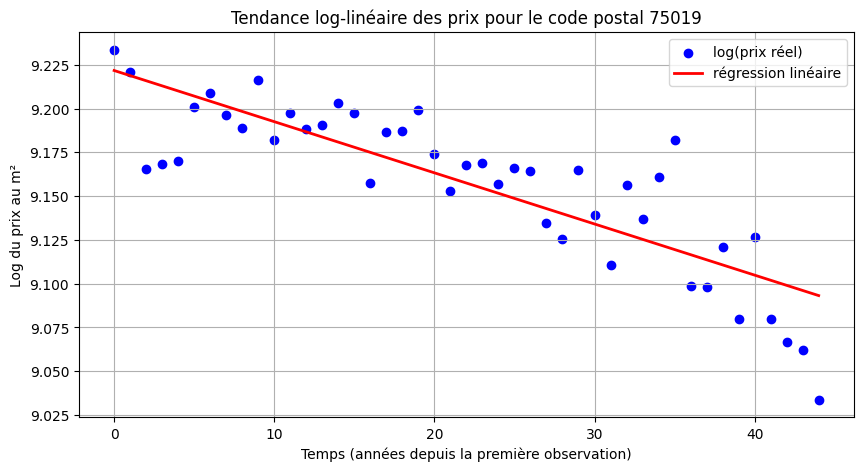

In [57]:
from sklearn.linear_model import LinearRegression

#  Visualisation de la tendance log-linéaire
# On choisit un code postal pour visualiser la tendance
print(train_mensuel["codePostal_recons"].unique())
code_postal_exemple = "75019"  # à adapter selon tes données

# Extraire les données correspondantes
df_exemple = train_mensuel[
    train_mensuel["codePostal_recons"] == code_postal_exemple
].dropna(subset=["log_prix", "t"])

print(df_exemple.shape)
print(df_exemple.head())
# Fit de la régression
X = df_exemple[["t"]]
y = df_exemple["log_prix"]
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

# Plot
plt.figure(figsize=(10, 5))
plt.scatter(df_exemple["t"], y, label="log(prix réel)", color="blue")
plt.plot(df_exemple["t"], y_pred, label="régression linéaire", color="red", linewidth=2)
plt.title(f"Tendance log-linéaire des prix pour le code postal {code_postal_exemple}")
plt.xlabel("Temps (années depuis la première observation)")
plt.ylabel("Log du prix au m²")
plt.legend()
plt.grid(True)
plt.show()

## Clustering avec KMeans

### Recherche du nombre optimal de clusters

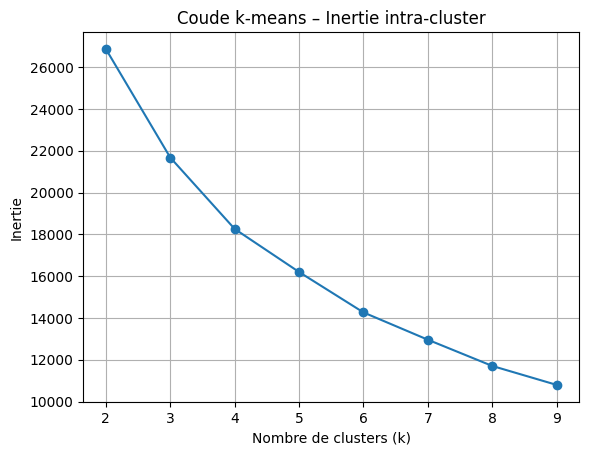

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# --- 0. Liste des features de clustering ---
features = [
    "prix_m2_std",
    "prix_m2_max",
    "prix_m2_min",
    "tc_am_reg",
    "prix_m2_cv",
    "avg_roll_3m",
    "avg_lag_1m",# "y_geo", "x_geo", "z_geo", #"taux_rendement_n7", "loyer_m2_median_n7"  ,
]

# --- 1. Préparer X_train & conserver l'index ---
X = (
    df_cluster_input[features]
    .replace([np.inf, -np.inf], np.nan)
)
X_train = X.dropna()
train_idx = X_train.index

# --- 2. Standardisation ---
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

# --- 3. Méthode du coude pour k de 2 à 9 ---
inertias = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    inertias.append(km.fit(X_train_scaled).inertia_)

plt.figure()
plt.plot(range(2, 10), inertias, marker="o")
plt.title("Coude k-means – Inertie intra-cluster")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie")
plt.grid(True)
plt.show()

# --- 4. Fit KMeans définitif (ici k=4) ---
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_train_scaled)

# On injecte ces labels DANS df_cluster_input
df_cluster_input.loc[train_idx, "cluster"] = labels.astype(int)



### Création du jeu de test avec les variables de train

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# ── 1. Nettoyage des anciennes colonnes ──
to_drop = features + ["cluster", "cluster_label"]
test_clean = test_clean.drop(columns=to_drop, errors="ignore")

# ── 2. Recréation de zone_mixte et codePostal_recons ──
cp_counts    = train_clean["codePostal"].value_counts()
cp_frequents = set(cp_counts[cp_counts >= 10].index.astype(str))

test_clean["zone_mixte"] = test_clean.apply(
    lambda row: regroup_code(row, cp_frequents),
    axis=1
)
test_clean["codePostal_recons"] = test_clean["zone_mixte"].apply(get_code_postal_final)
test_clean.drop(columns=["zone_mixte"], inplace=True)

# ── 3. Fusion des features agrégées ──
test_clean = test_clean.merge(
    df_cluster_input[["codePostal_recons"] + features],
    on="codePostal_recons",
    how="left"
)

# Vérification que toutes les features sont présentes
missing = set(features) - set(test_clean.columns)
if missing:
    raise ValueError(f"Il manque ces colonnes dans test_clean avant clustering : {missing}")

# ── 4. Filtrage des lignes complètes et prédiction ──
# On ne clusterise que les lignes sans NaN
mask_valid = ~test_clean[features].isna().any(axis=1)
X_test_valid   = test_clean.loc[mask_valid, features]
X_test_scaled  = scaler.transform(X_test_valid)

test_clean.loc[mask_valid, "cluster"] = kmeans.predict(X_test_scaled)



### fixation des clusters

In [60]:
# ── 5. Mapping vers un label lisible ──
cluster_order = (
    df_cluster_input
    .groupby("cluster")["prix_m2_mean"]
    .mean()
    .sort_values()
    .index
    .tolist()
)
cluster_names = [
    "Zones rurales, petites villes stagnantes",
    "Centres urbains établis, zones résidentielles",
    "Banlieues, zones mixtes",
    "Zones tendues - secteurs spéculatifs",
]
mapping = dict(zip(cluster_order, cluster_names))

df_cluster_input['cluster_label']=df_cluster_input['cluster'].map(mapping)
test_clean.loc[mask_valid, "cluster_label"] = test_clean.loc[mask_valid, "cluster"].map(mapping)

# ── 6. Résultat ──
print(test_clean.loc[mask_valid, ["codePostal_recons"] + features + ["cluster", "cluster_label"]].head())
print(f"{mask_valid.sum()} lignes sur {len(test_clean)} assignées à un cluster.")


  codePostal_recons  prix_m2_std  prix_m2_max  prix_m2_min  tc_am_reg  \
0             01000   469.208451       4875.0  1835.048889   4.338907   
1             01000   469.208451       4875.0  1835.048889   4.338907   
2             01000   469.208451       4875.0  1835.048889   4.338907   
3             01000   469.208451       4875.0  1835.048889   4.338907   
4             01000   469.208451       4875.0  1835.048889   4.338907   

   prix_m2_cv  avg_roll_3m   avg_lag_1m  cluster  \
0    0.197359   2363.00772  2366.589718      0.0   
1    0.197359   2363.00772  2366.589718      0.0   
2    0.197359   2363.00772  2366.589718      0.0   
3    0.197359   2363.00772  2366.589718      0.0   
4    0.197359   2363.00772  2366.589718      0.0   

                              cluster_label  
0  Zones rurales, petites villes stagnantes  
1  Zones rurales, petites villes stagnantes  
2  Zones rurales, petites villes stagnantes  
3  Zones rurales, petites villes stagnantes  
4  Zones rurales, 

### Visualisation

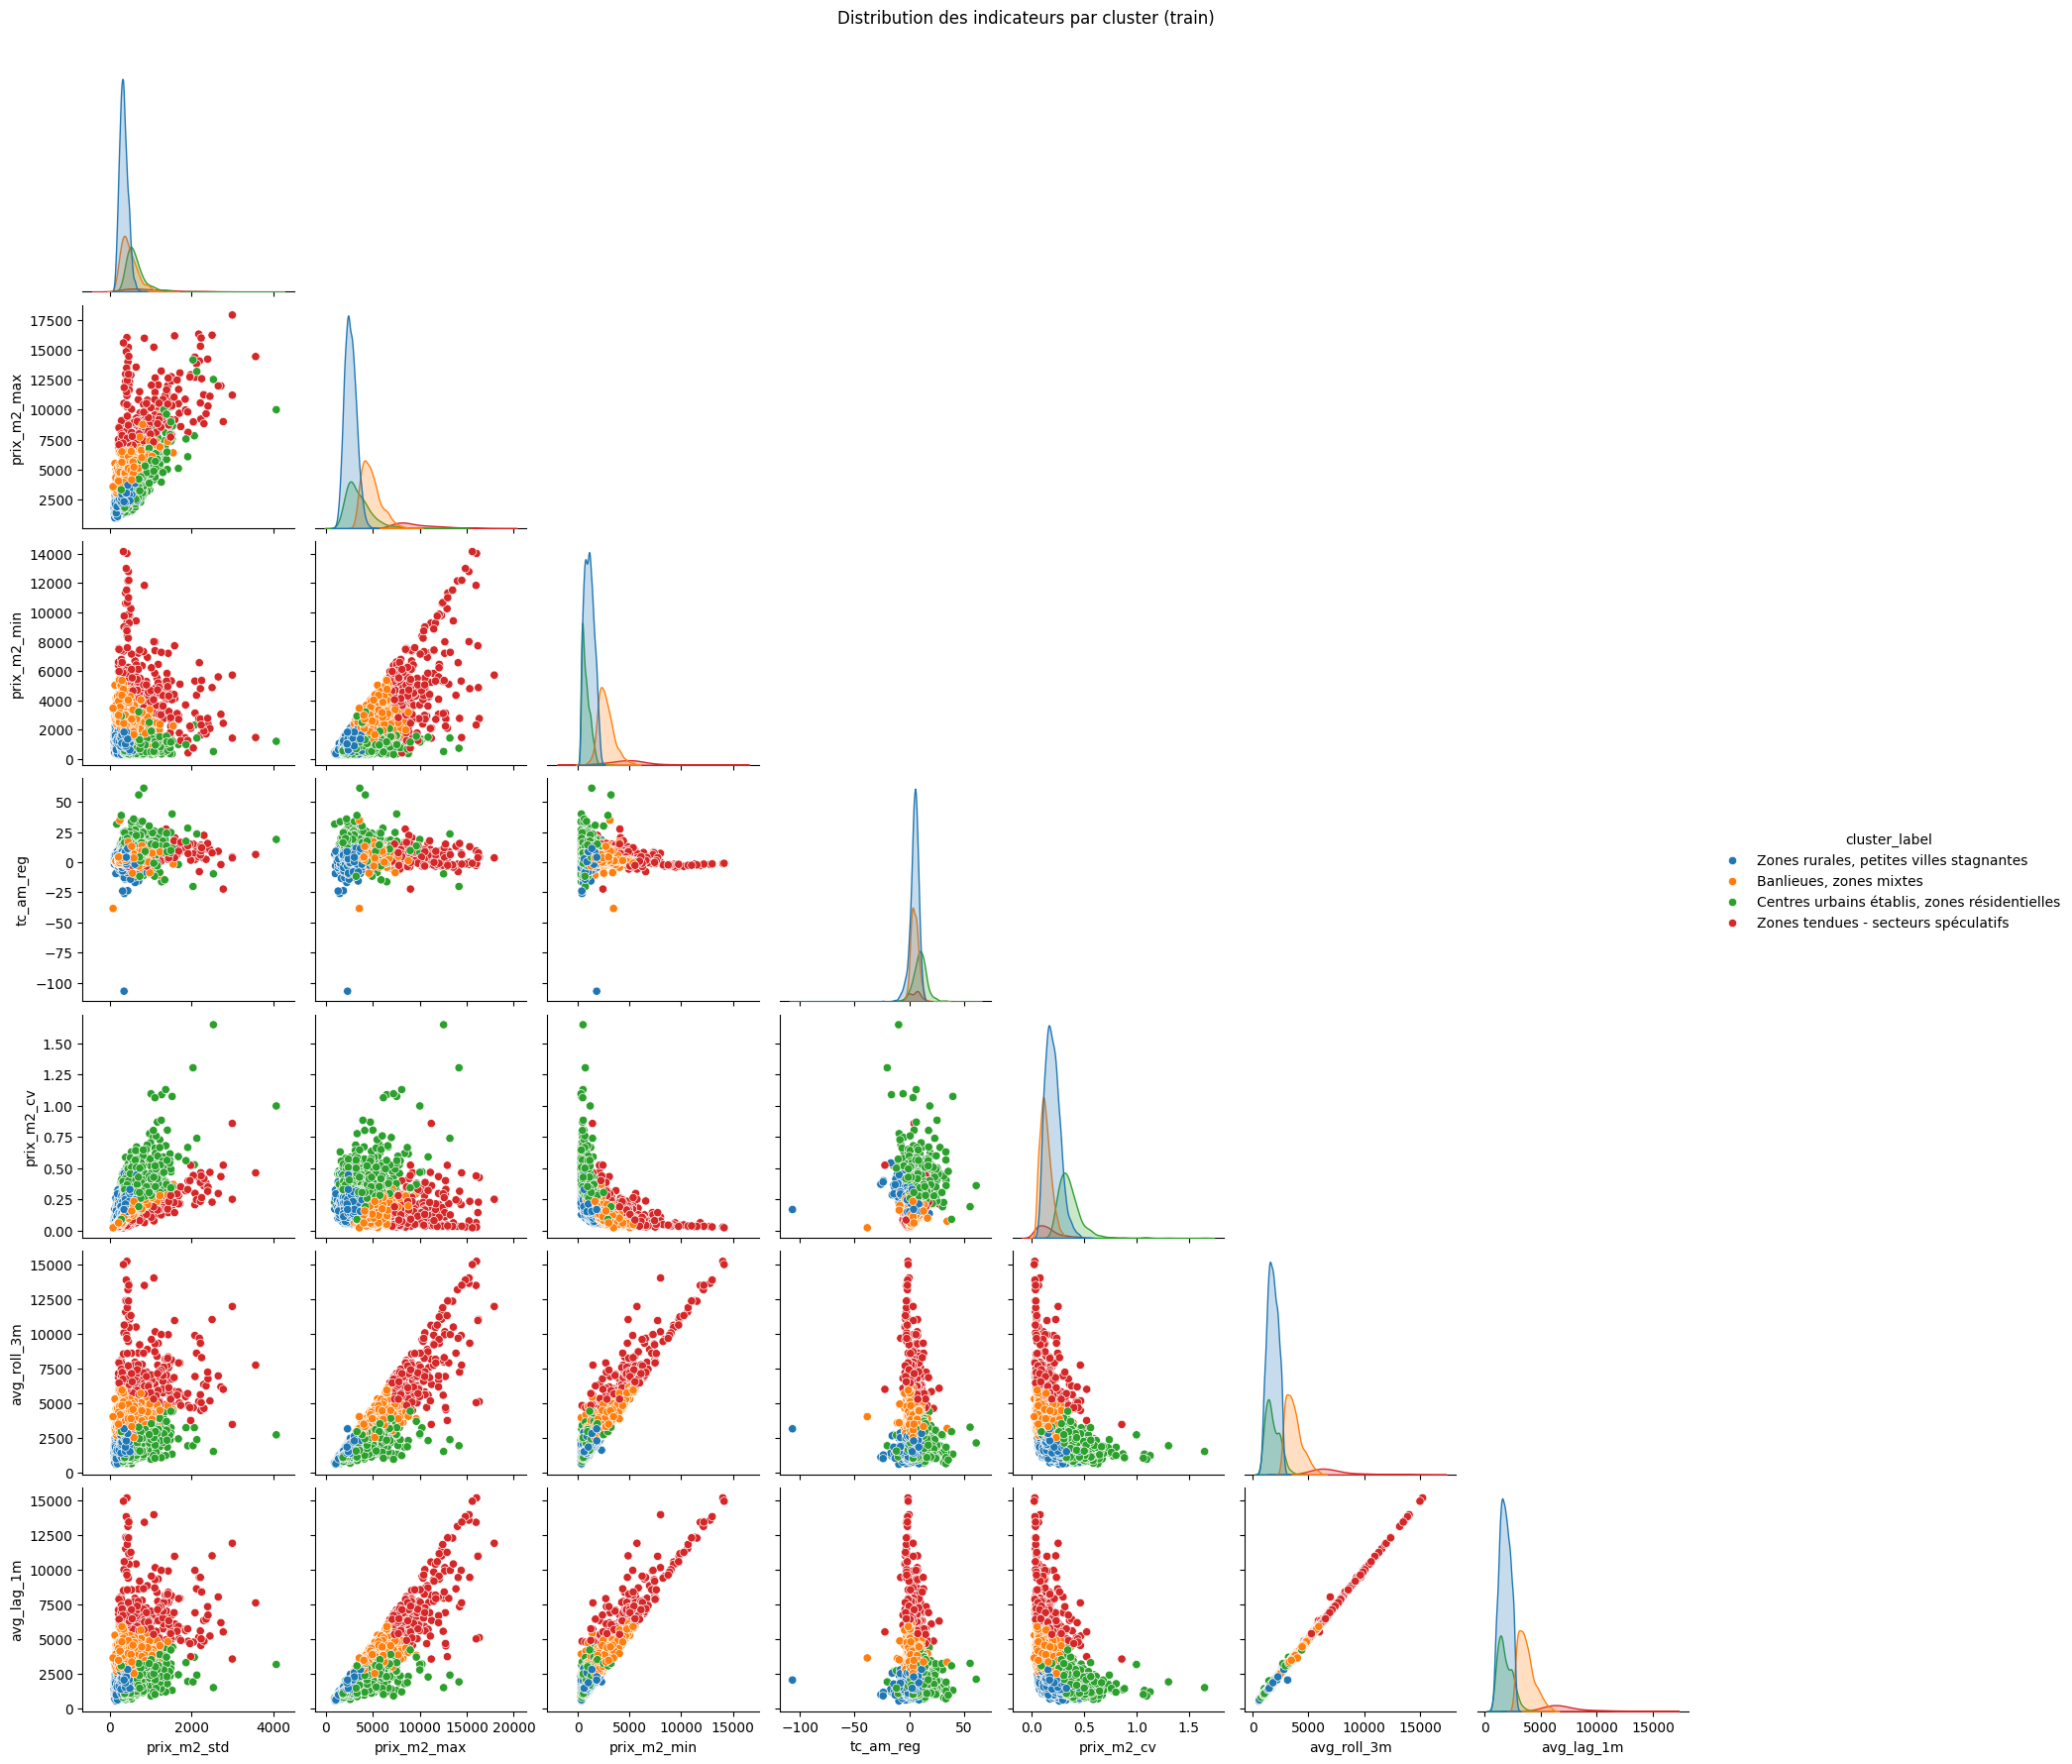

In [61]:
cluster_palette = {
    "Zones rurales, petites villes stagnantes":    "#1f77b4",
    "Banlieues, zones mixtes":                    "#ff7f0e",
    "Centres urbains établis, zones résidentielles":"#2ca02c",
    "Zones tendues - secteurs spéculatifs":        "#d62728",
}

# visualisation
sns.pairplot(
    df_cluster_input,
    vars=features,
    hue="cluster_label",
    hue_order=list(cluster_palette.keys()),
    palette=cluster_palette,
    corner=True            # pour n’afficher que la moitié inférieure et gagner en lisibilité
)
plt.suptitle("Distribution des indicateurs par cluster (train)", y=1.02)
plt.show()



| Cluster |  Couleur  | Niveau de prix |    Volatilité   |    Croissance (tc\_am\_reg)   | Interprétation économique                                       |
| :-----: | :-------: | :------------: | :-------------: | :---------------------------: | :-------------------------------------------------------------- |
|    0    |  🔵 Bleu  |   **Faible**   | **Très faible** | **Faible / parfois négative** | **Zones rurales / petites villes stagnantes**                   |
|    1    | 🟠 Orange |  **Moyen-bas** |   **Modérée**   |          **Modérée**          | **Périphéries et banlieues**                   |
|    2    |  🟢 Vert  | **Moyen-haut** |   **Modérée**   |      **Modérée à bonne**      | **Centres urbains établis, marchés résidentiels stables**       |
|    3    |  🔴 Rouge | **Très élevé** |    **Élevée**   |           **Forte**           | **Zones tendues / spéculatives (luxe, hypercentre, littoral…)** |


### Visualisation sur une map

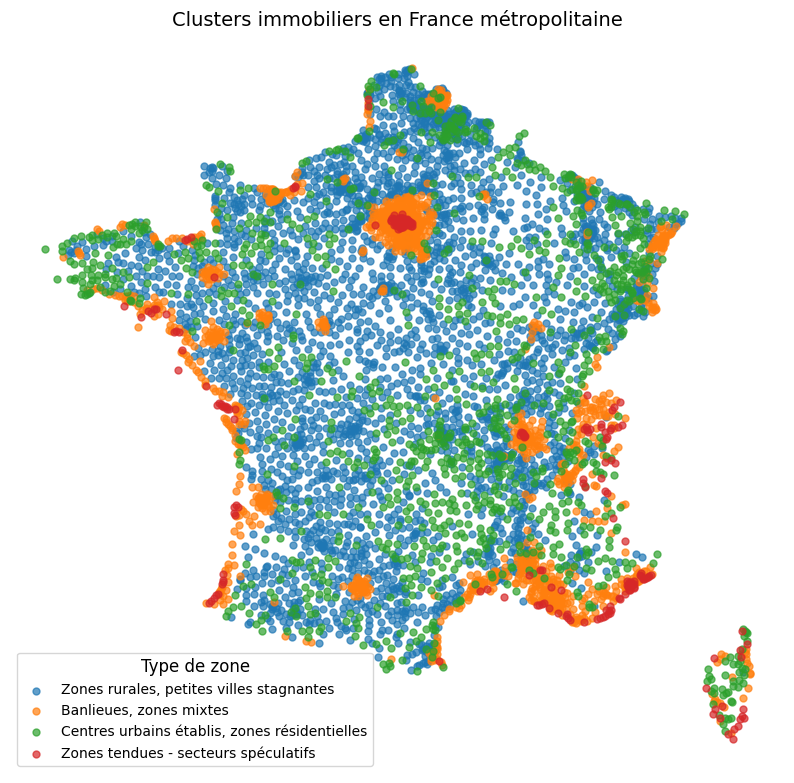

C:\Users\charl\AppData\Local\Temp\ipykernel_27452\3451202757.py:85: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




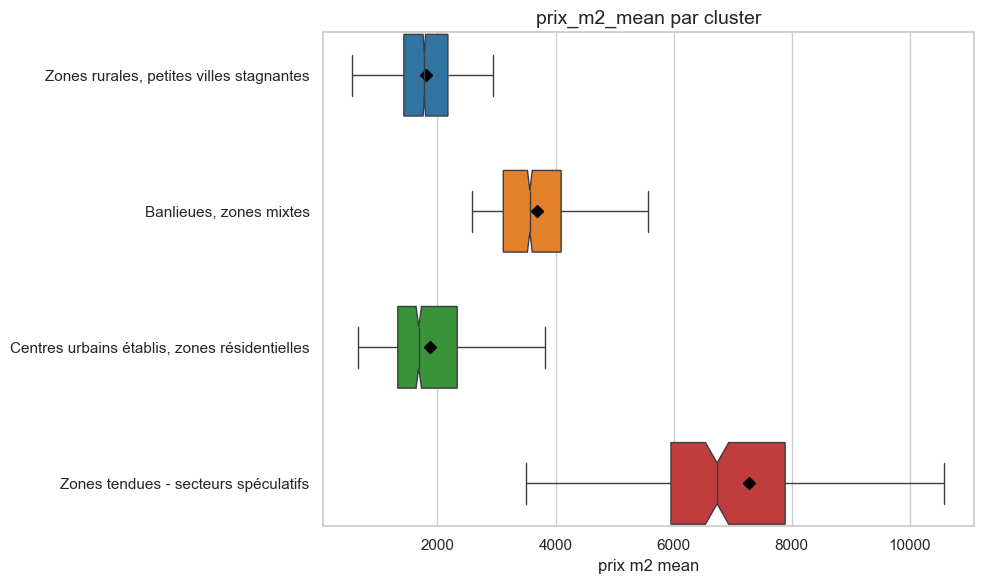

C:\Users\charl\AppData\Local\Temp\ipykernel_27452\3451202757.py:85: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




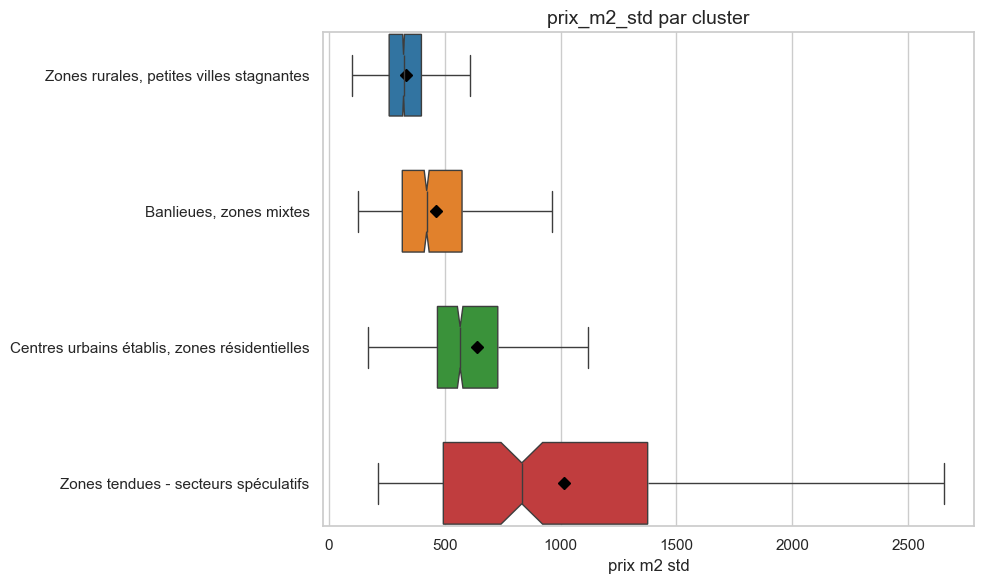

C:\Users\charl\AppData\Local\Temp\ipykernel_27452\3451202757.py:85: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




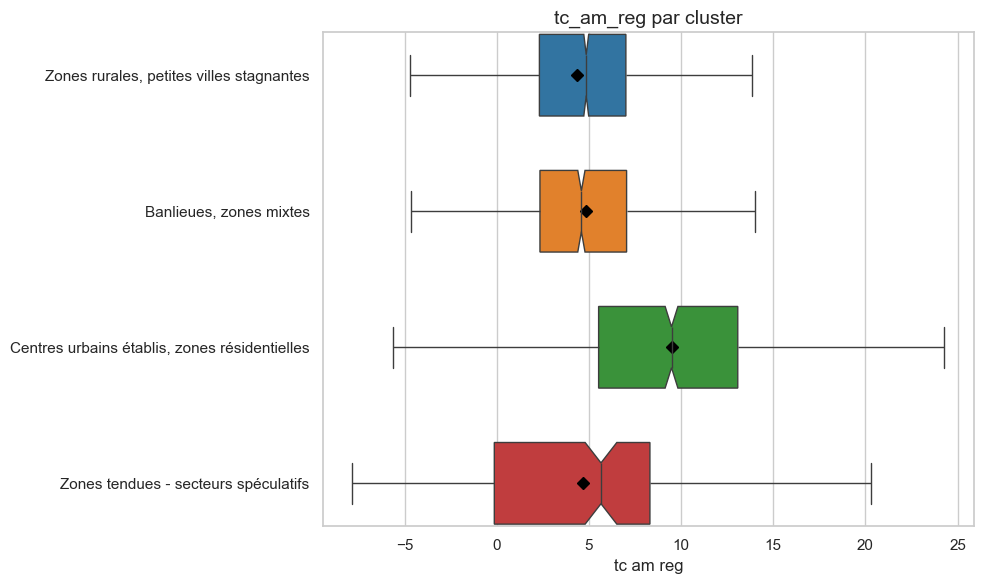

C:\Users\charl\AppData\Local\Temp\ipykernel_27452\3451202757.py:85: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




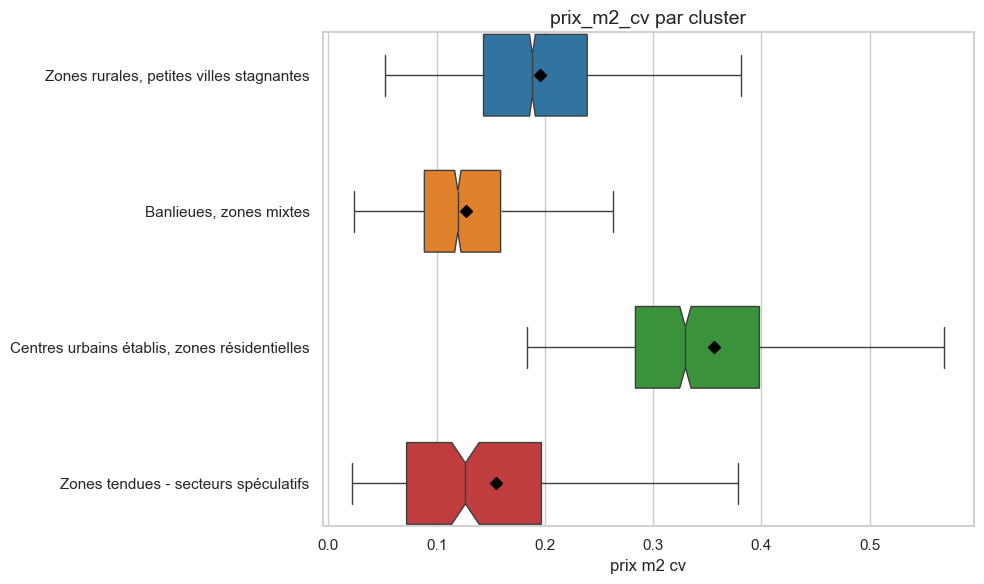

C:\Users\charl\AppData\Local\Temp\ipykernel_27452\3451202757.py:85: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




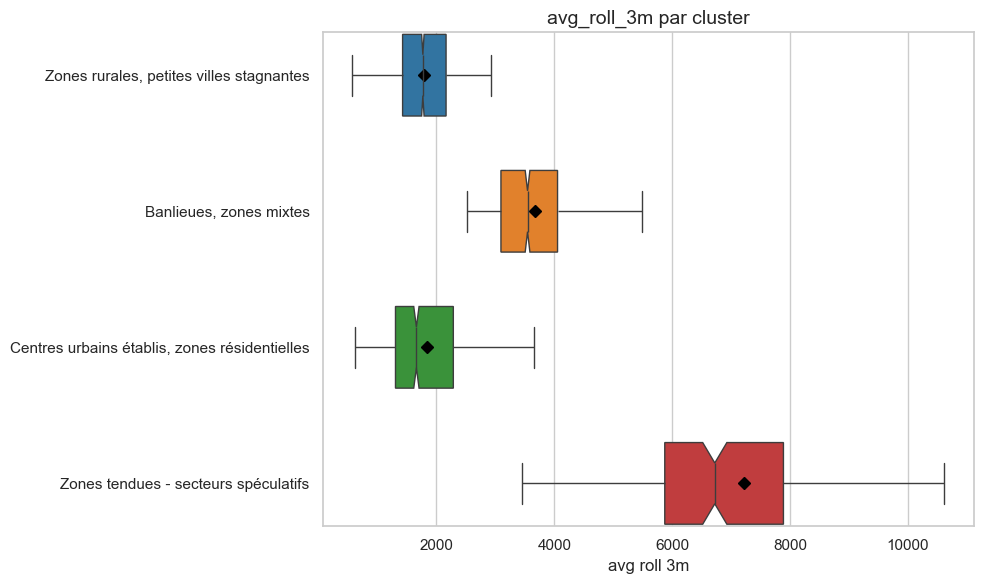

C:\Users\charl\AppData\Local\Temp\ipykernel_27452\3451202757.py:85: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




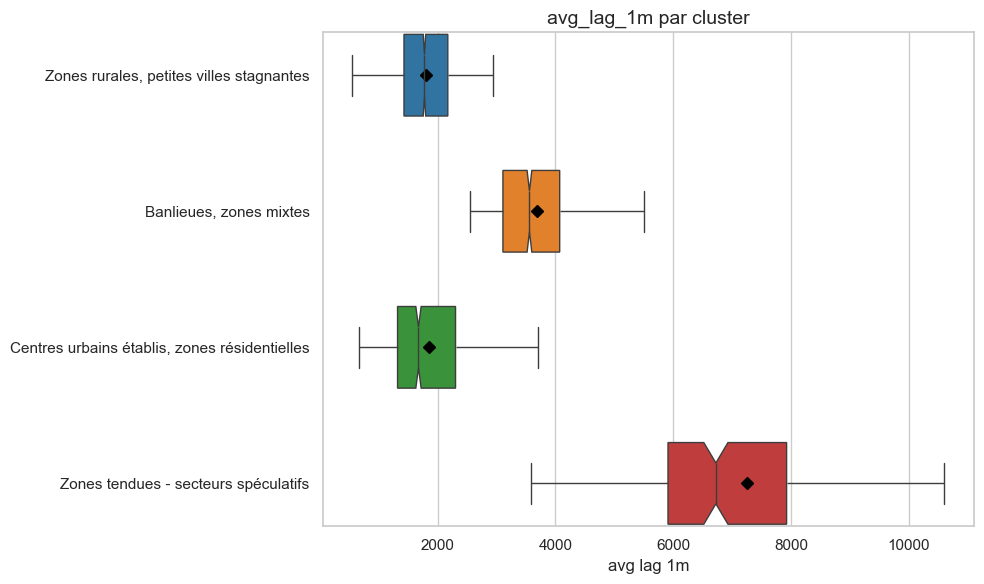

In [63]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
import matplotlib.patches as mpatches

# ── 0. Préparer la liste des codes postaux fréquents ──
cp_counts       = train_clean["codePostal"].value_counts()
cp_frequents_str = set(cp_counts[cp_counts >= 10].index.astype(str))

# ── 1. Fonction “string-only” pour regrouper les codes postaux ──
def regroup_code_str(cp: str, freq_set: set) -> str:
    if cp in freq_set:
        return cp
    if cp.startswith("97"):
        return cp[:3]
    if cp.isdigit() and len(cp) == 5:
        return cp[:2]
    return "inconnu"

# ── 2. Calculer les centroïdes (lat/lon moyennes) par codePostal ──
coord_cp = (
    train_clean
    .dropna(subset=["mapCoordonneesLatitude", "mapCoordonneesLongitude"])
    .groupby("codePostal")[["mapCoordonneesLatitude","mapCoordonneesLongitude"]]
    .mean()
    .reset_index()
)

# ── 3. Appliquer le regroupement et reconstruire codePostal_recons ──
coord_cp["zone_mixte"]        = coord_cp["codePostal"].astype(str).apply(
    lambda cp: regroup_code_str(cp, cp_frequents_str)
)
coord_cp["codePostal_recons"] = coord_cp["zone_mixte"].apply(get_code_postal_final)

# ── 4. Fusionner avec votre df_cluster_input (qui porte cluster & cluster_label) ──
geo_df = pd.merge(
    df_cluster_input.reset_index(),  # attention: index doit devenir col. réindexez sinon
    coord_cp[["codePostal_recons","mapCoordonneesLatitude","mapCoordonneesLongitude"]],
    on="codePostal_recons",
    how="left"
).dropna(subset=["mapCoordonneesLatitude","mapCoordonneesLongitude"])

# ── 5. Transformer en GeoDataFrame ──
geometry = [
    Point(xy) for xy in zip(
        geo_df["mapCoordonneesLongitude"],
        geo_df["mapCoordonneesLatitude"]
    )
]
geo_df = gpd.GeoDataFrame(geo_df, geometry=geometry, crs="EPSG:4326")

# Optionnel : ne garder que la métropole
geo_df = geo_df[~geo_df["codePostal_recons"].str.startswith(("97","98"))]

# ── 6. Choisir une palette de couleurs sur les labels ──


# ── 7. Tracer la carte en boucle pour une légende propre ──
fig, ax = plt.subplots(figsize=(10,12))
for lbl, color in cluster_palette.items():
    subset = geo_df[geo_df["cluster_label"] == lbl]
    subset.plot(
        ax=ax,
        color=color,
        markersize=25,
        alpha=0.7,
        label=lbl
    )
ax.legend(title="Type de zone", loc="lower left", fontsize=10, title_fontsize=12)
ax.set_title("Clusters immobiliers en France métropolitaine", fontsize=14)
ax.axis("off")
plt.show()

# ── 8. Boxplots explicatifs par cluster ──
features_box = ["prix_m2_mean","prix_m2_std","tc_am_reg","prix_m2_cv","avg_roll_3m","avg_lag_1m"]
sns.set_theme(style="whitegrid", palette="pastel")

order = list(cluster_palette.keys())

for feat in features_box:
    plt.figure(figsize=(10, 6))
    
    ax = sns.boxplot(
        y="cluster_label",           # on bascule en horizontal
        x=feat,
        data=geo_df,
        order=order,
        palette=cluster_palette,
        notch=True,                  # crans
        showfliers=False,            # pas les outliers extrêmes
        width=0.6
    )
    
    # Superposer les moyennes
    means = geo_df.groupby("cluster_label")[feat].mean().reindex(order)
    for i, m in enumerate(means):
        ax.plot(m, i, marker="D", color="black", label="_nolegend_")
    
    ax.set_title(f"{feat} par cluster", fontsize=14)
    ax.set_xlabel(feat.replace("_", " "), fontsize=12)
    ax.set_ylabel("")  # on conserve seulement le label des clusters
    plt.tight_layout()
    plt.show()

##### Cluster “Zones rurales, petites villes stagnantes” (0 – 🔵 Bleu)

- **Position** : tout en bas à gauche du pairplot (prix et volatilité très faibles).  
- **Prix** : niveaux très bas, boîtes compactes autour de la médiane.  
- **Volatilité (std)** : quasi nulle, marché extrêmement homogène.  
- **TCAM** : souvent négatif ou proche de 0 % (marché en légère décroissance ou plat).  
- **Interprétation** : zones rurales ou petites communes sans dynamisme immobilier.  

---

##### Cluster “Périphéries et banlieues en développement” (1 – 🟠 Orange)

- **Position** : nuage médian-bas du pairplot, dispersion intermédiaire.  
- **Prix** : moyens modérés (un cran au-dessus du rural), avec quelques valeurs plus hautes.  
- **Volatilité (std)** : modérée – présence de segments plus chers ou récents à côté d’anciens.  
- **TCAM** : modérément positif (3–6 % typiquement), témoignant d’une croissance en rattrapage.  
- **Interprétation** : zones périurbaines, communes mixtes ou en renouvellement, marchés en pleine émergence.  

---

##### Cluster “Centres urbains établis, zones résidentielles stables” (2 – 🟢 Vert)

- **Position** : nuage médian-haut, forte concentration autour de prix élevés mais volatilité limitée.  
- **Prix** : moyens hauts, boîtes serrées indiquant un marché homogène et mature.  
- **Volatilité (std)** : contenue – peu d’écarts extrêmes.  
- **TCAM** : positif modéré (5–8 %), croissance stable et prévisible.  
- **Interprétation** : cœurs de villes établies, quartiers résidentiels haut de gamme, marchés matures.  

---

##### Cluster “Zones tendues – secteurs spéculatifs” (3 – 🔴 Rouge)

- **Position** : tout en haut à droite, points très élevés sur prix et dispersion.  
- **Prix** : très élevés (médianes et max au sommet), large boîte signalant de fortes disparités.  
- **Volatilité (std)** : élevée – mélange de biens très chers et de transactions spéculatives.  
- **TCAM** : souvent supérieur à 10 %, croissance soutenue par la spéculation et la pression de la demande.  
- **Interprétation** : hypercentre, zones touristiques ou littorales, marchés très tendus et spéculatifs.  


## Vérifications et export des données

In [64]:
# Etape 4: export des données
display(test_clean.head())
display(test_clean["cluster"].value_counts())
# Et en pourcentage du total
print(test_clean["cluster"].value_counts(normalize=True) * 100)

,date,typedebien,typedetransaction,etage,surface,surface_terrain,nb_pieces,balcon,eau,bain,...,codePostal_recons,prix_m2_std,prix_m2_max,prix_m2_min,tc_am_reg,prix_m2_cv,avg_roll_3m,avg_lag_1m,cluster,cluster_label
0,2024-06-01,m,v,0.0,275.0,NaN,7.0,0,0.0,0.0,...,01000,469.208451,4875.0,1835.048889,4.338907,0.197359,2363.00772,2366.589718,0.0,"Zones rurales, petites villes stagnantes"
1,2024-08-01,m,v,0.0,225.0,1000.0,6.0,0,0.0,0.0,...,01000,469.208451,4875.0,1835.048889,4.338907,0.197359,2363.00772,2366.589718,0.0,"Zones rurales, petites villes stagnantes"
2,2024-10-01,m,v,0.0,229.0,NaN,7.0,0,0.0,0.0,...,01000,469.208451,4875.0,1835.048889,4.338907,0.197359,2363.00772,2366.589718,0.0,"Zones rurales, petites villes stagnantes"
3,2024-11-01,m,v,0.0,198.0,1030.0,7.0,0,1.0,2.0,...,01000,469.208451,4875.0,1835.048889,4.338907,0.197359,2363.00772,2366.589718,0.0,"Zones rurales, petites villes stagnantes"
4,2025-02-01,m,v,0.0,220.0,1000.0,6.0,0,0.0,0.0,...,01000,469.208451,4875.0,1835.048889,4.338907,0.197359,2363.00772,2366.589718,0.0,"Zones rurales, petites villes stagnantes"


cluster
3.0    569728
0.0    547456
2.0    131071
1.0     72612
Name: count, dtype: int64

cluster
3.0    43.132882
0.0    41.446716
2.0     9.923104
1.0     5.497298
Name: proportion, dtype: float64


## Préparation Encodage des facteurs exogènes pour SARIMAX

### Création d'une liste de facteurs exogènes

In [65]:
variables_exp = ["taux_rendement_n7", "loyer_m2_median_n7","y_geo", "x_geo", "z_geo", "dpeL", "nb_pieces", 'IPS_primaire','rental_yield_pct']

Pour notre modélisation, nous allons choisir SARIMAX
Pour cela nous aurons besoin de preprocesser et encoder nos facteurs exogènes

### Preprocessing du dataset pour SARIMAX
Nous allons prendre les Top 10 features issus de la feature selection (Part-2) ainsi que d'autres variables macro-eco (IPS, %chomage, %Taux immobilier...)
'taux_rendement_n7', 'loyer_m2_median_n7', 'y_geo', 'x_geo', 'z_geo', 'taux_rendement_n6', 'nb_pieces' 

Pour le taux d'emprunt immobilier, nous avons pris le taux d'emprunt à 10 ans, de part le fait que l'information est complète

#### Variables pour SARIMAX : encodage et standardisation

##### Encodage de la variable géographique

In [66]:
# ENCODAGE DES VARIABLES GEOGRAPHIQUES
import numpy as np

lat_rad = np.radians(train_clean["mapCoordonneesLatitude"].values)
lon_rad = np.radians(train_clean["mapCoordonneesLongitude"].values)

# Projection sur la sphère unité :

### X_Train ###
train_clean["x_geo"] = np.cos(lat_rad) * np.cos(lon_rad)
train_clean["y_geo"] = np.cos(lat_rad) * np.sin(lon_rad)
train_clean["z_geo"] = np.sin(lat_rad)

### X_Test ###
lat_rad_test = np.radians(test_clean["mapCoordonneesLatitude"].values)
lon_rad_test = np.radians(test_clean["mapCoordonneesLongitude"].values)
test_clean["x_geo"] = np.cos(lat_rad_test) * np.cos(lon_rad_test)
test_clean["y_geo"] = np.cos(lat_rad_test) * np.sin(lon_rad_test)
test_clean["z_geo"] = np.sin(lat_rad_test)

# Les valeurs retournés sont comprises entre -1 et 1
# z est la latitude absolue (Nord /sud)
# x > 0 → vers l’Est (Greenwich → 90° E)
# x < 0 → vers l’Ouest (Greenwich → 90° O)
# y > 0 → moitié Nord de l’équateur (longitudes entre 0° et 180° E)
# y < 0 → moitié Sud (longitudes entre 0° et 180° O)

# suppression des colonnes Latitude et Longitude
train_clean = train_clean.drop(
    columns=["mapCoordonneesLongitude", "mapCoordonneesLatitude"]
)
test_clean = test_clean.drop(
    columns=["mapCoordonneesLongitude", "mapCoordonneesLatitude"]
)

# Verification
print(test_clean.head())
print(train_clean.head())

        date typedebien typedetransaction  etage  surface  surface_terrain  \
0 2024-06-01          m                 v    0.0    275.0              NaN   
1 2024-08-01          m                 v    0.0    225.0           1000.0   
2 2024-10-01          m                 v    0.0    229.0              NaN   
3 2024-11-01          m                 v    0.0    198.0           1030.0   
4 2025-02-01          m                 v    0.0    220.0           1000.0   

   nb_pieces  balcon  eau  bain  ...  prix_m2_min  tc_am_reg  prix_m2_cv  \
0        7.0       0  0.0   0.0  ...  1835.048889   4.338907    0.197359   
1        6.0       0  0.0   0.0  ...  1835.048889   4.338907    0.197359   
2        7.0       0  0.0   0.0  ...  1835.048889   4.338907    0.197359   
3        7.0       0  1.0   2.0  ...  1835.048889   4.338907    0.197359   
4        6.0       0  0.0   0.0  ...  1835.048889   4.338907    0.197359   

   avg_roll_3m   avg_lag_1m cluster                             cluster_la

##### Encodage dpeL

In [67]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


# creation d'une pipeline pour faire un imputer et un encodage
impute = SimpleImputer(strategy="most_frequent")
encode = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1)
train_clean["dpeL"] = train_clean["dpeL"].astype(str)
test_clean["dpeL"] = test_clean["dpeL"].astype(str)
# On crée une pipeline pour le prétraitement
pipeline = Pipeline(steps=[("imputer", impute), ("encoder", encode)])
# On applique la pipeline sur les colonnes catégorielles

train_clean["dpeL"] = pipeline.fit_transform(train_clean["dpeL"].values.reshape(-1, 1))
test_clean["dpeL"] = pipeline.transform(test_clean["dpeL"].values.reshape(-1, 1))

# Afficher les résultats
print("train_clean['dpeL'] après transformation :")
print(train_clean["dpeL"].unique())
print("test_clean['dpeL'] après transformation :")
print(test_clean["dpeL"].unique())

train_clean['dpeL'] après transformation :
[5. 3. 4. 9. 2. 6. 7. 8. 1. 0.]
test_clean['dpeL'] après transformation :
[3. 1. 2. 5. 4. 7. 0. 6. 9. 8.]


##### Ajout de la variable cluster à train_data (donnée non agrégée)

In [ ]:

# 2. Positionnez df_cluster_input pour un mapping rapide
cluster_map = df_cluster_input.set_index("codePostal_recons")
train_clean["codePostal_recons"] = (train_clean["zone_mixte"].apply(get_code_postal_final))

train_clean['cluster'] = train_clean["codePostal_recons"].map(cluster_map['cluster'])

# 4. Vos autres features propres à train_clean restent :
#    "taux_rendement_n7", "loyer_m2_median_n7", "y_geo", "x_geo", "z_geo"

# Résultat : train_clean contient maintenant toutes les variables_exp
print(train_clean.head())



              date typedebien typedetransaction  etage  surface  \
684826  2020-10-01          m                 v    0.0     88.0   
2744289 2023-05-01          m                 v    0.0    250.0   
1869    2020-01-01          a                 v    4.0     92.0   
3048    2020-01-01          m                 v    0.0    147.0   
5868    2020-01-01          m                 v    0.0    169.0   

         surface_terrain  nb_pieces  balcon  eau  bain  ...  codePostal  \
684826               NaN        4.0       0  0.0   0.0  ...       01710   
2744289           1500.0        7.0       0  1.0   2.0  ...       01710   
1869                 NaN        5.0       0  0.0   1.0  ...       01000   
3048               592.0        7.0       0  0.0   0.0  ...       01000   
5868               866.0        6.0       0  1.0   1.0  ...       01000   

         departement  zone_mixte  prix_lag_1m  prix_roll_3m     x_geo  \
684826            01          01          NaN           NaN  0.687819   


##### Standardisation des facteurs exogènes

In [69]:
# Standardisation des variables numériques
from sklearn.preprocessing import StandardScaler


# Créer une instance de StandardScaler
scaler = StandardScaler()

# Ajuster le scaler sur les données d'entraînement
train_clean[variables_exp] = scaler.fit_transform(train_clean[variables_exp])

# Appliquer la transformation sur les données de test
test_clean[variables_exp] = scaler.transform(test_clean[variables_exp])

# Vérification de la standardisation
print(train_clean[variables_exp].head())
print(test_clean[variables_exp].head())

         taux_rendement_n7  loyer_m2_median_n7     y_geo     x_geo     z_geo  \
684826           -0.362139            0.475458  0.630410  0.092152  0.004261   
2744289          -0.496360           -0.254271  0.631334  0.091316  0.004608   
1869              0.756364           -0.874062  0.504184  0.134695 -0.004576   
3048             -0.048958           -1.191127  0.501141  0.138621 -0.006420   
5868             -0.138439           -0.929827  0.502970  0.140208 -0.007499   

             dpeL  nb_pieces  IPS_primaire  rental_yield_pct  
684826   0.155384  -0.146231     -0.712686               NaN  
2744289 -0.565063   1.356049     -0.712686               NaN  
1869    -0.565063   0.354529      0.310099               NaN  
3048    -0.565063   1.356049      0.310099               NaN  
5868    -0.204840   0.855289      0.310099               NaN  
   taux_rendement_n7  loyer_m2_median_n7     y_geo     x_geo     z_geo  \
0          -0.317399           -0.254271  0.631295  0.091854  0.004

### Creation d'un dataframe Monthly avec variables standardisés pour SARIMAX

In [70]:
# Regroupement mensuel par cluster – uniquement sur le train
variables_exp = [
    col for col in variables_exp if col not in ("cluster", "date")
]  # Regroupement mensuel par cluster (train uniquement)
# On regroupe par cluster et date
agg_cluster_monthly = (
    train_clean.groupby(["cluster", "date"], as_index=False)
    .agg({**{"prix_m2_vente": "mean"}, **{col: "mean" for col in variables_exp  }})
    .reset_index()
)

# Ajouter un indicateur split train/test pour plus tard (test sera prédit séparément)
agg_cluster_monthly["split"] = "train"

# Export sécurisé sans data leak
# agg_cluster_monthly.to_csv("agg_cluster_monthly.csv", index=False)



# Regroupement mensuel par cluster (test uniquement)
agg_cluster_monthly_test = test_clean.groupby(["cluster", "date"], as_index=False).agg(
    {"prix_m2_vente": "mean", **{col: "mean" for col in variables_exp}}
)
# Ajouter un indicateur split
agg_cluster_monthly_test["split"] = "test"

# Export pour inspection
# agg_cluster_monthly_test.to_csv("agg_cluster_monthly_test.csv", index=False)

#### Agrégation par mois et Création de la variable taux d'emprunt immobilier

In [ ]:
# !pip install openpyxl

In [71]:
train_periodique_q12 = (
    agg_cluster_monthly[agg_cluster_monthly["split"] == "train"]
    .set_index("date")
    .drop(columns=["split"])
)
test_periodique_q12 = (
    agg_cluster_monthly_test[agg_cluster_monthly_test["split"] == "test"]
    .set_index("date")
    .drop(columns=["split"])
)


# display(train_periodique_q12.head(5))

##############################################################################
# Importer les données de taux d'intérêt
################################################################################
# Chemins d'accès aux fichiers

# chemin_taux_M = '/Users/maximehenon/Documents/GitHub/MAR25_BDS_Compagnon_Immo/data'
chemin_taux_Y = ("C:/Users/charl/OneDrive/Documents/Yasmine/DATASCIENTEST/FEV25-BDS-COMPAGNON/data")
# chemin_taux_C = '../data/banking'
# chemin_taux_L = '/Users/loick.d/Documents/Datascientest/Github immo/MAR25_BDS_Compagnon_Immo/data'

chemin_taux = os.path.join(chemin_taux_Y, "Taux immo.xlsx")
# chemin_taux = os.path.join(chemin_taux_C, 'Taux immo.xlsx')
# chemin_taux = os.path.join(chemin_taux_L, 'Taux immo.xlsx')
# chemin_taux = os.path.join(chemin_taux_M, 'Taux immo.xlsx')

# Importer les taux d'intérêt
import pandas as pd

taux = pd.read_excel(chemin_taux)
taux["date"] = pd.to_datetime(taux["date"], format="%Y-%m-%d")
taux = taux.set_index("date")
taux["taux"] = (
    taux["10 ans"].str.replace("%", "").str.replace(",", ".").str.strip().astype(float)
)
# display(taux.head(5))

# Fusionner les données de taux d'intérêt avec les données d'agrégation mensuelle
train_periodique_q12 = train_periodique_q12.merge(
    taux, left_index=True, right_index=True, how="left"
)
test_periodique_q12 = test_periodique_q12.merge(
    taux, left_index=True, right_index=True, how="left"
)

# Vérification de la fusion
# display(train_periodique_q12.head(5))


# Standardisation des taux d'intérêt
scal = StandardScaler()
train_periodique_q12["taux"] = scal.fit_transform(train_periodique_q12[["taux"]])
test_periodique_q12["taux"] = scal.transform(test_periodique_q12[["taux"]])
# Vérification de la standardisation
# print(train_periodique_q12.head())
# print(test_periodique_q12['taux'].head())
train_periodique_q12 = train_periodique_q12.reset_index()
test_periodique_q12 = test_periodique_q12.reset_index()

train_periodique_q12["prix_m2_vente"] = np.log(train_periodique_q12["prix_m2_vente"])
test_periodique_q12["prix_m2_vente"] = np.log(test_periodique_q12["prix_m2_vente"])


# Ne garder que les colonnes variables_exp
variables_exp = ["taux_rendement_n7", "loyer_m2_median_n7","y_geo", "x_geo", "z_geo", "dpeL", "nb_pieces", 'IPS_primaire','rental_yield_pct', 'taux']

train_periodique_q12 = train_periodique_q12[
    variables_exp + ["prix_m2_vente", "cluster", "date"]
]
test_periodique_q12 = test_periodique_q12[
    variables_exp + ["prix_m2_vente", "cluster", "date"]
]
# Vérification de la structure finale
print(train_periodique_q12.head())
print(test_periodique_q12.head())

   taux_rendement_n7  loyer_m2_median_n7     y_geo     x_geo     z_geo  \
0           0.982523           -0.750876 -0.021392  0.059856 -0.051658   
1           0.843566           -0.614714 -0.253039 -0.079532 -0.236455   
2          -0.454377            1.193485  0.283960  0.240464 -0.084317   
3           0.074218            0.073472  0.068218  0.261201 -0.185299   
4           0.812673           -0.709808 -0.004202 -0.048630 -0.014405   

       dpeL  nb_pieces  IPS_primaire  rental_yield_pct      taux  \
0  0.082899   0.331840     -0.450807          0.862490 -0.624802   
1  0.286180   0.394876     -0.360789          0.678596 -0.624802   
2  0.206438  -0.335212      0.586141         -1.289374 -0.624802   
3  0.059561  -0.129143      0.125403         -0.415850 -0.624802   
4  0.084086   0.205932     -0.406964          0.772855 -0.624802   

   prix_m2_vente  cluster       date  
0       7.408758      0.0 2020-01-01  
1       7.474197      1.0 2020-01-01  
2       8.860088      2.0 202

## Export des datasets

In [72]:
# # Enregistrer le DataFrame final
train_periodique_q12.to_csv(
    os.path.join(folder_path_Y, "train_periodique_q12.csv"), sep=";", index=True
)
test_periodique_q12.to_csv(
    os.path.join(folder_path_Y, "test_periodique_q12.csv"), sep=";", index=True
)

# folder_path_M = ''
# folder_path_L = ''
# folder_path_C = '../data/processed/Sales'

# train_periodique_q12.to_csv(os.path.join(folder_path_C, 'train_periodique_q12.csv'), sep=';', index=True)
# test_periodique_q12.to_csv(os.path.join(folder_path_C, 'test_periodique_q12.csv'), sep=';', index=True)

# train_periodique_q12.to_csv(os.path.join(folder_path_M, 'train_periodique_q12.csv'), sep=';', index=True)
# test_periodique_q12.to_csv(os.path.join(folder_path_M, 'test_periodique_q12.csv'), sep=';', index=True)

# train_periodique_q12.to_csv(os.path.join(folder_path_L, 'train_periodique_q12.csv'), sep=';', index=True)
# test_periodique_q12.to_csv(os.path.join(folder_path_L, 'test_periodique_q12.csv'), sep=';', index=True)


# Enregistrer les dataset Train_clean et test_clean
train_clean.to_csv(os.path.join(folder_path_Y, "train_clean_ST.csv"), sep=";", index=True)
test_clean.to_csv(os.path.join(folder_path_Y, "test_clean_ST.csv"), sep=";", index=True)

# train_clean.to_csv(os.path.join(folder_path_C, "train_clean_ST.csv"), sep=";", index=True)
# test_clean.to_csv(os.path.join(folder_path_C, "test_clean_ST.csv"), sep=";", index=True)

# train_clean.to_csv(os.path.join(folder_path_M, 'train_clean.csv'), sep=';', index=True)
# test_clean.to_csv(os.path.join(folder_path_M, 'test_clean.csv'), sep=';', index=True)

# train_clean.to_csv(os.path.join(folder_path_L, 'train_clean.csv'), sep=';', index=True)
# test_clean.to_csv(os.path.join(folder_path_L, 'test_clean.csv'), sep=';', index=True)